# <center>Heart Data analysis using Machine Learning

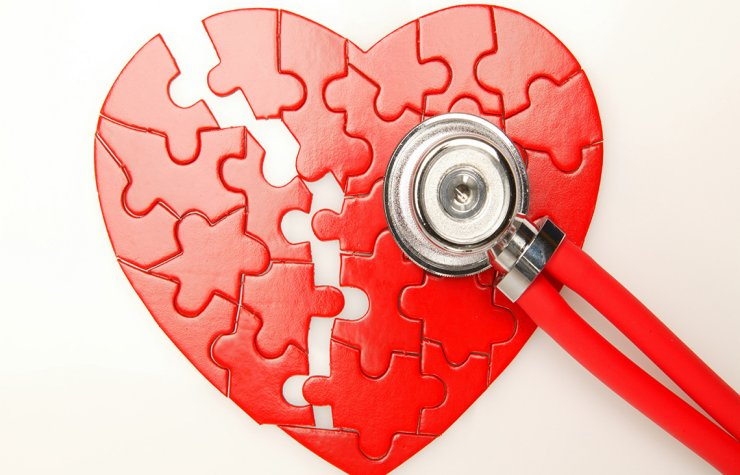

#### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import roc_curve, auc,accuracy_score,confusion_matrix
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize, StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from itertools import cycle

#### Loading the dataset

In [3]:
df = pd.read_csv('./heart.csv')
df.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
55,52,1,1,134,201,0,1,158,0,0.8,2,1,2,1
257,50,1,0,144,200,0,0,126,1,0.9,1,0,3,0
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
243,57,1,0,152,274,0,1,88,1,1.2,1,1,3,0


In [4]:
df.target.unique()

array([1, 0], dtype=int64)

#### Exploring the data

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.shape

(303, 14)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


#### checking the null percentage

In [10]:
df.isnull().mean()*100

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

#### Chceking duplicate values

In [11]:
df.duplicated().mean()*100

0.33003300330033003

In [12]:
df.drop_duplicates(inplace=True)

## Explorartory Data Analysis

### Univariate Analysis

#### Histogram 

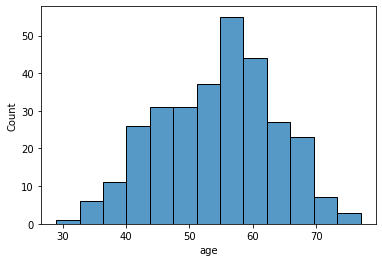

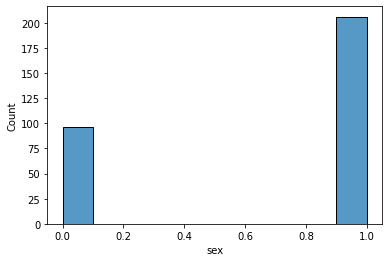

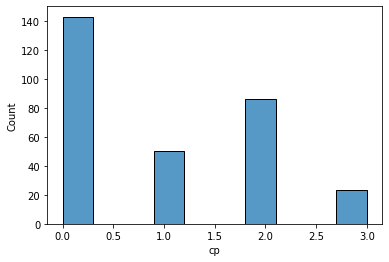

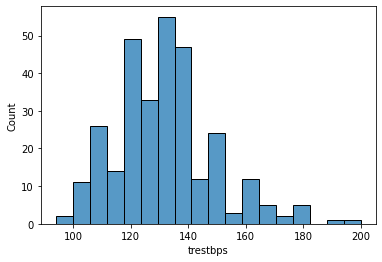

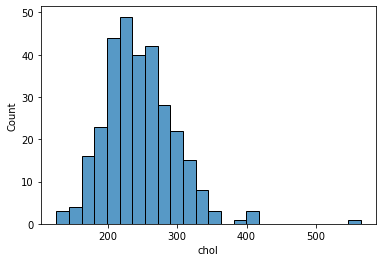

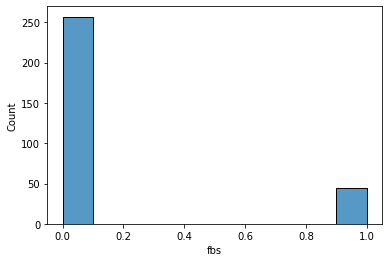

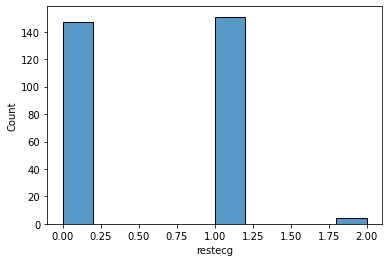

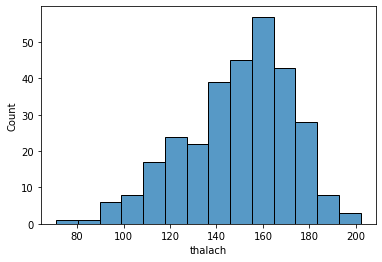

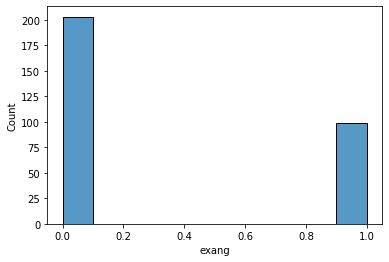

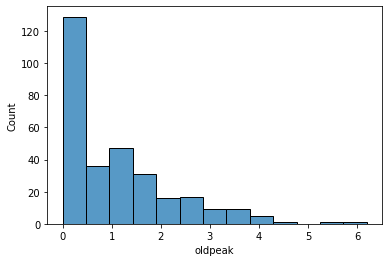

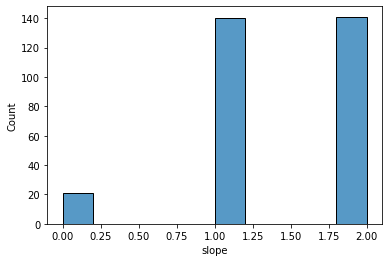

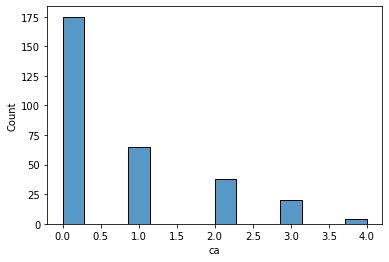

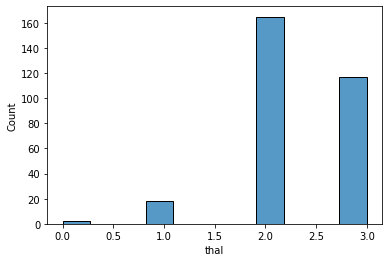

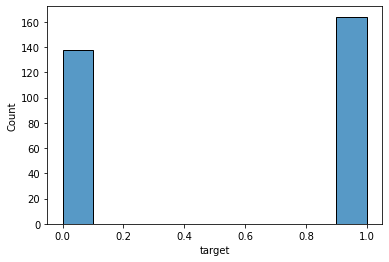

In [13]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.histplot(x=df[i])
        plt.show();

#### Kde Plot

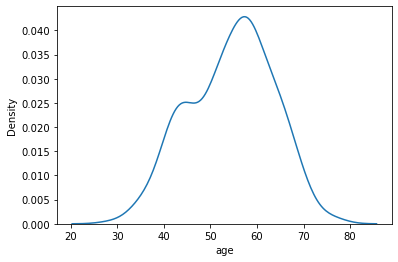

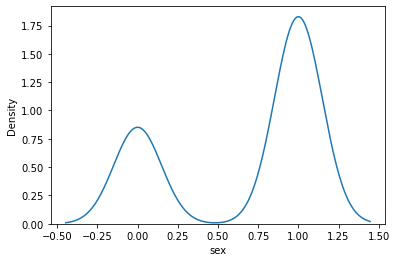

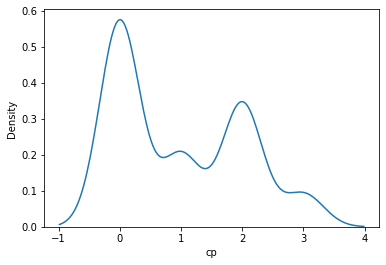

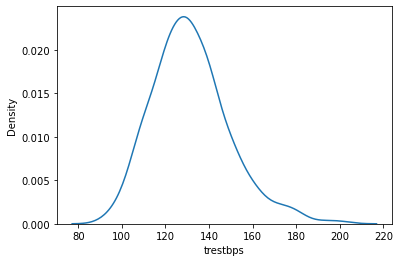

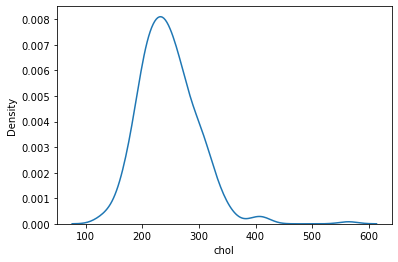

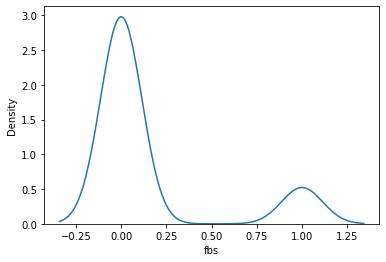

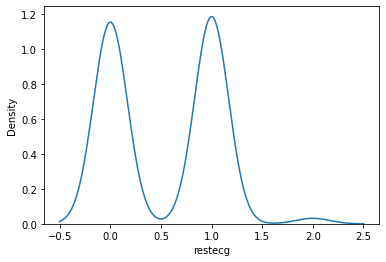

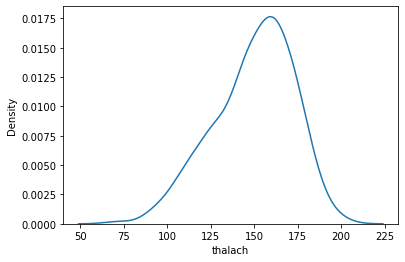

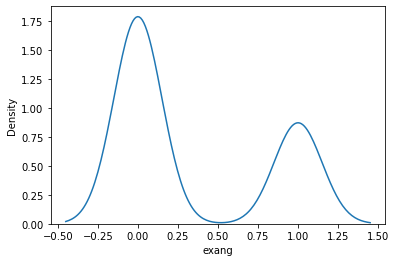

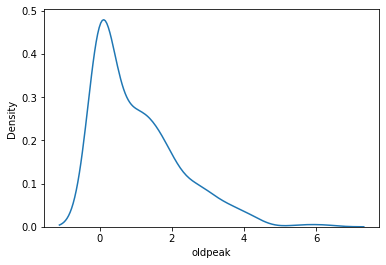

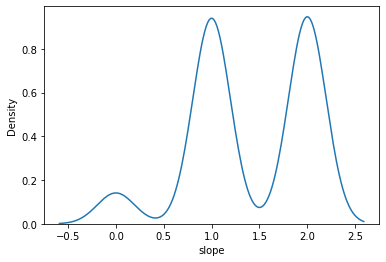

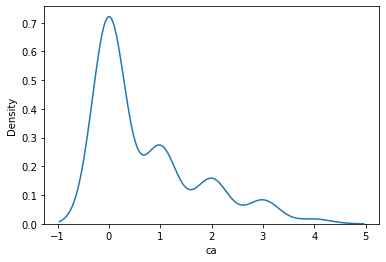

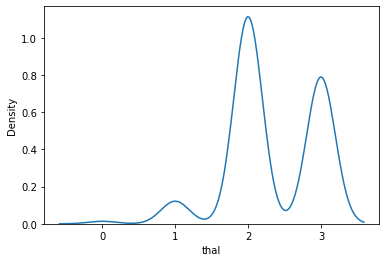

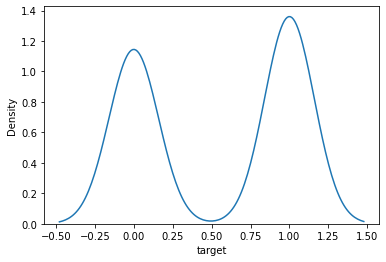

In [14]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.kdeplot(x=df[i])
        plt.show();

#### Box Plot

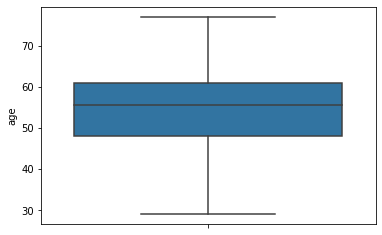

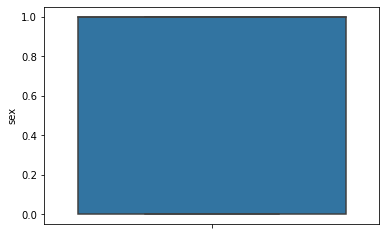

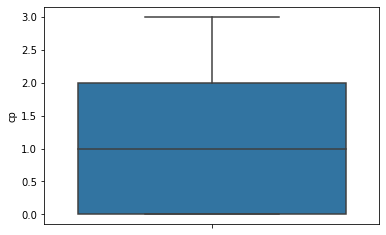

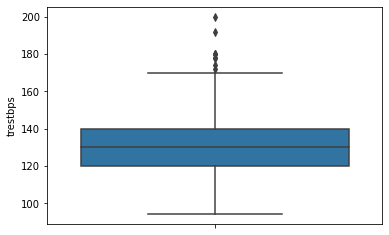

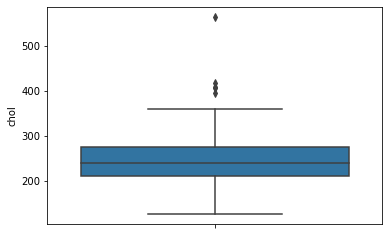

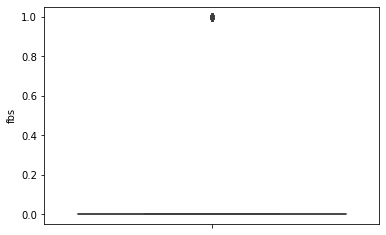

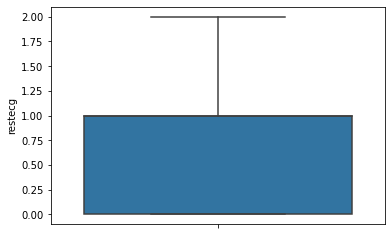

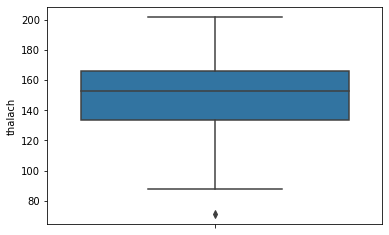

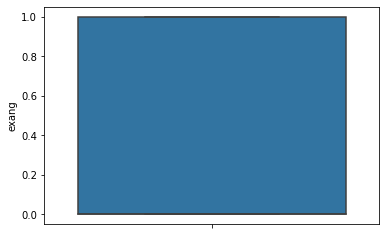

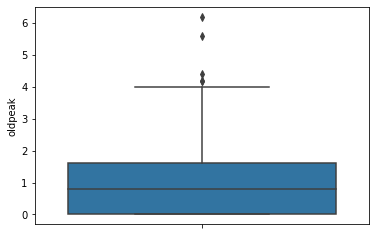

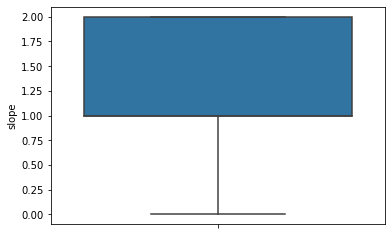

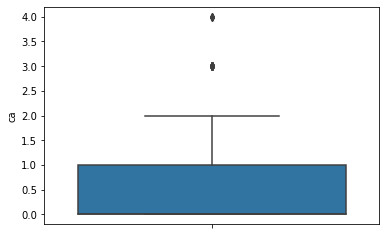

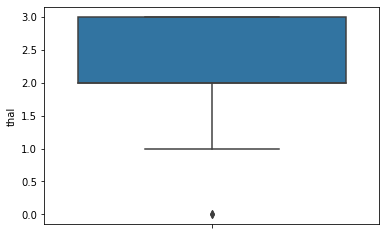

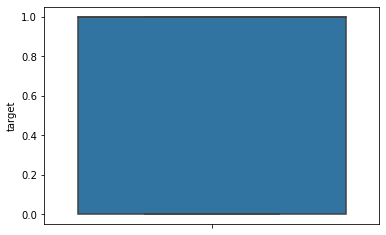

In [15]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.boxplot(y=df[i])
        plt.show();

### Multivariate Analysis

#### Bar Chart

In [16]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

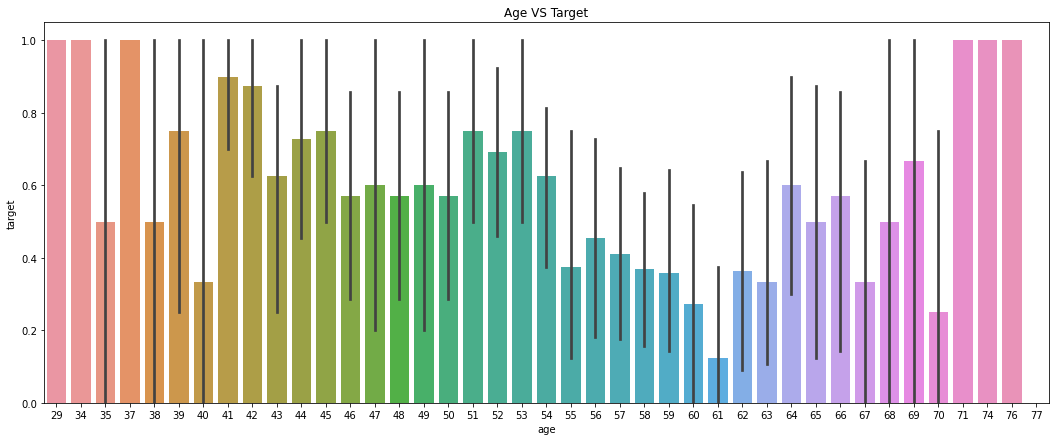

In [18]:
plt.figure(figsize=(18,7))
plt.title("Age VS Target")
sns.barplot(x='age', y='target', data=df);

#### Pie Chart

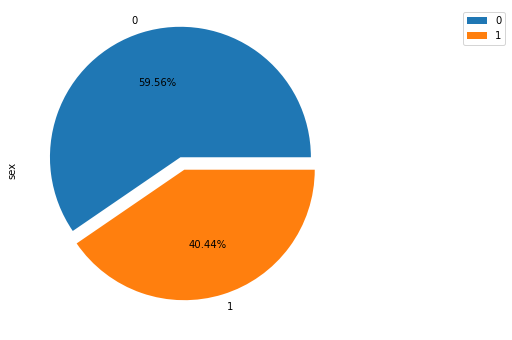

In [21]:
plt.figure(figsize=(14,6))
target_sex=df.groupby(['target'])['sex'].mean()
explode=0.1,0
target_sex.plot.pie(autopct='%1.2f%%',explode=explode)
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

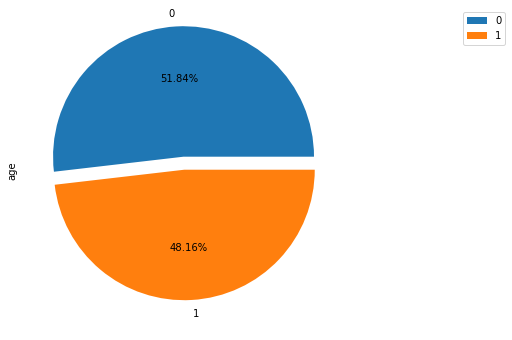

In [22]:
plt.figure(figsize=(14,6))
target_age=df.groupby(['target'])['age'].mean()
explode=0.1,0
target_age.plot.pie(autopct='%1.2f%%',explode=explode)
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

#### Pair Plot

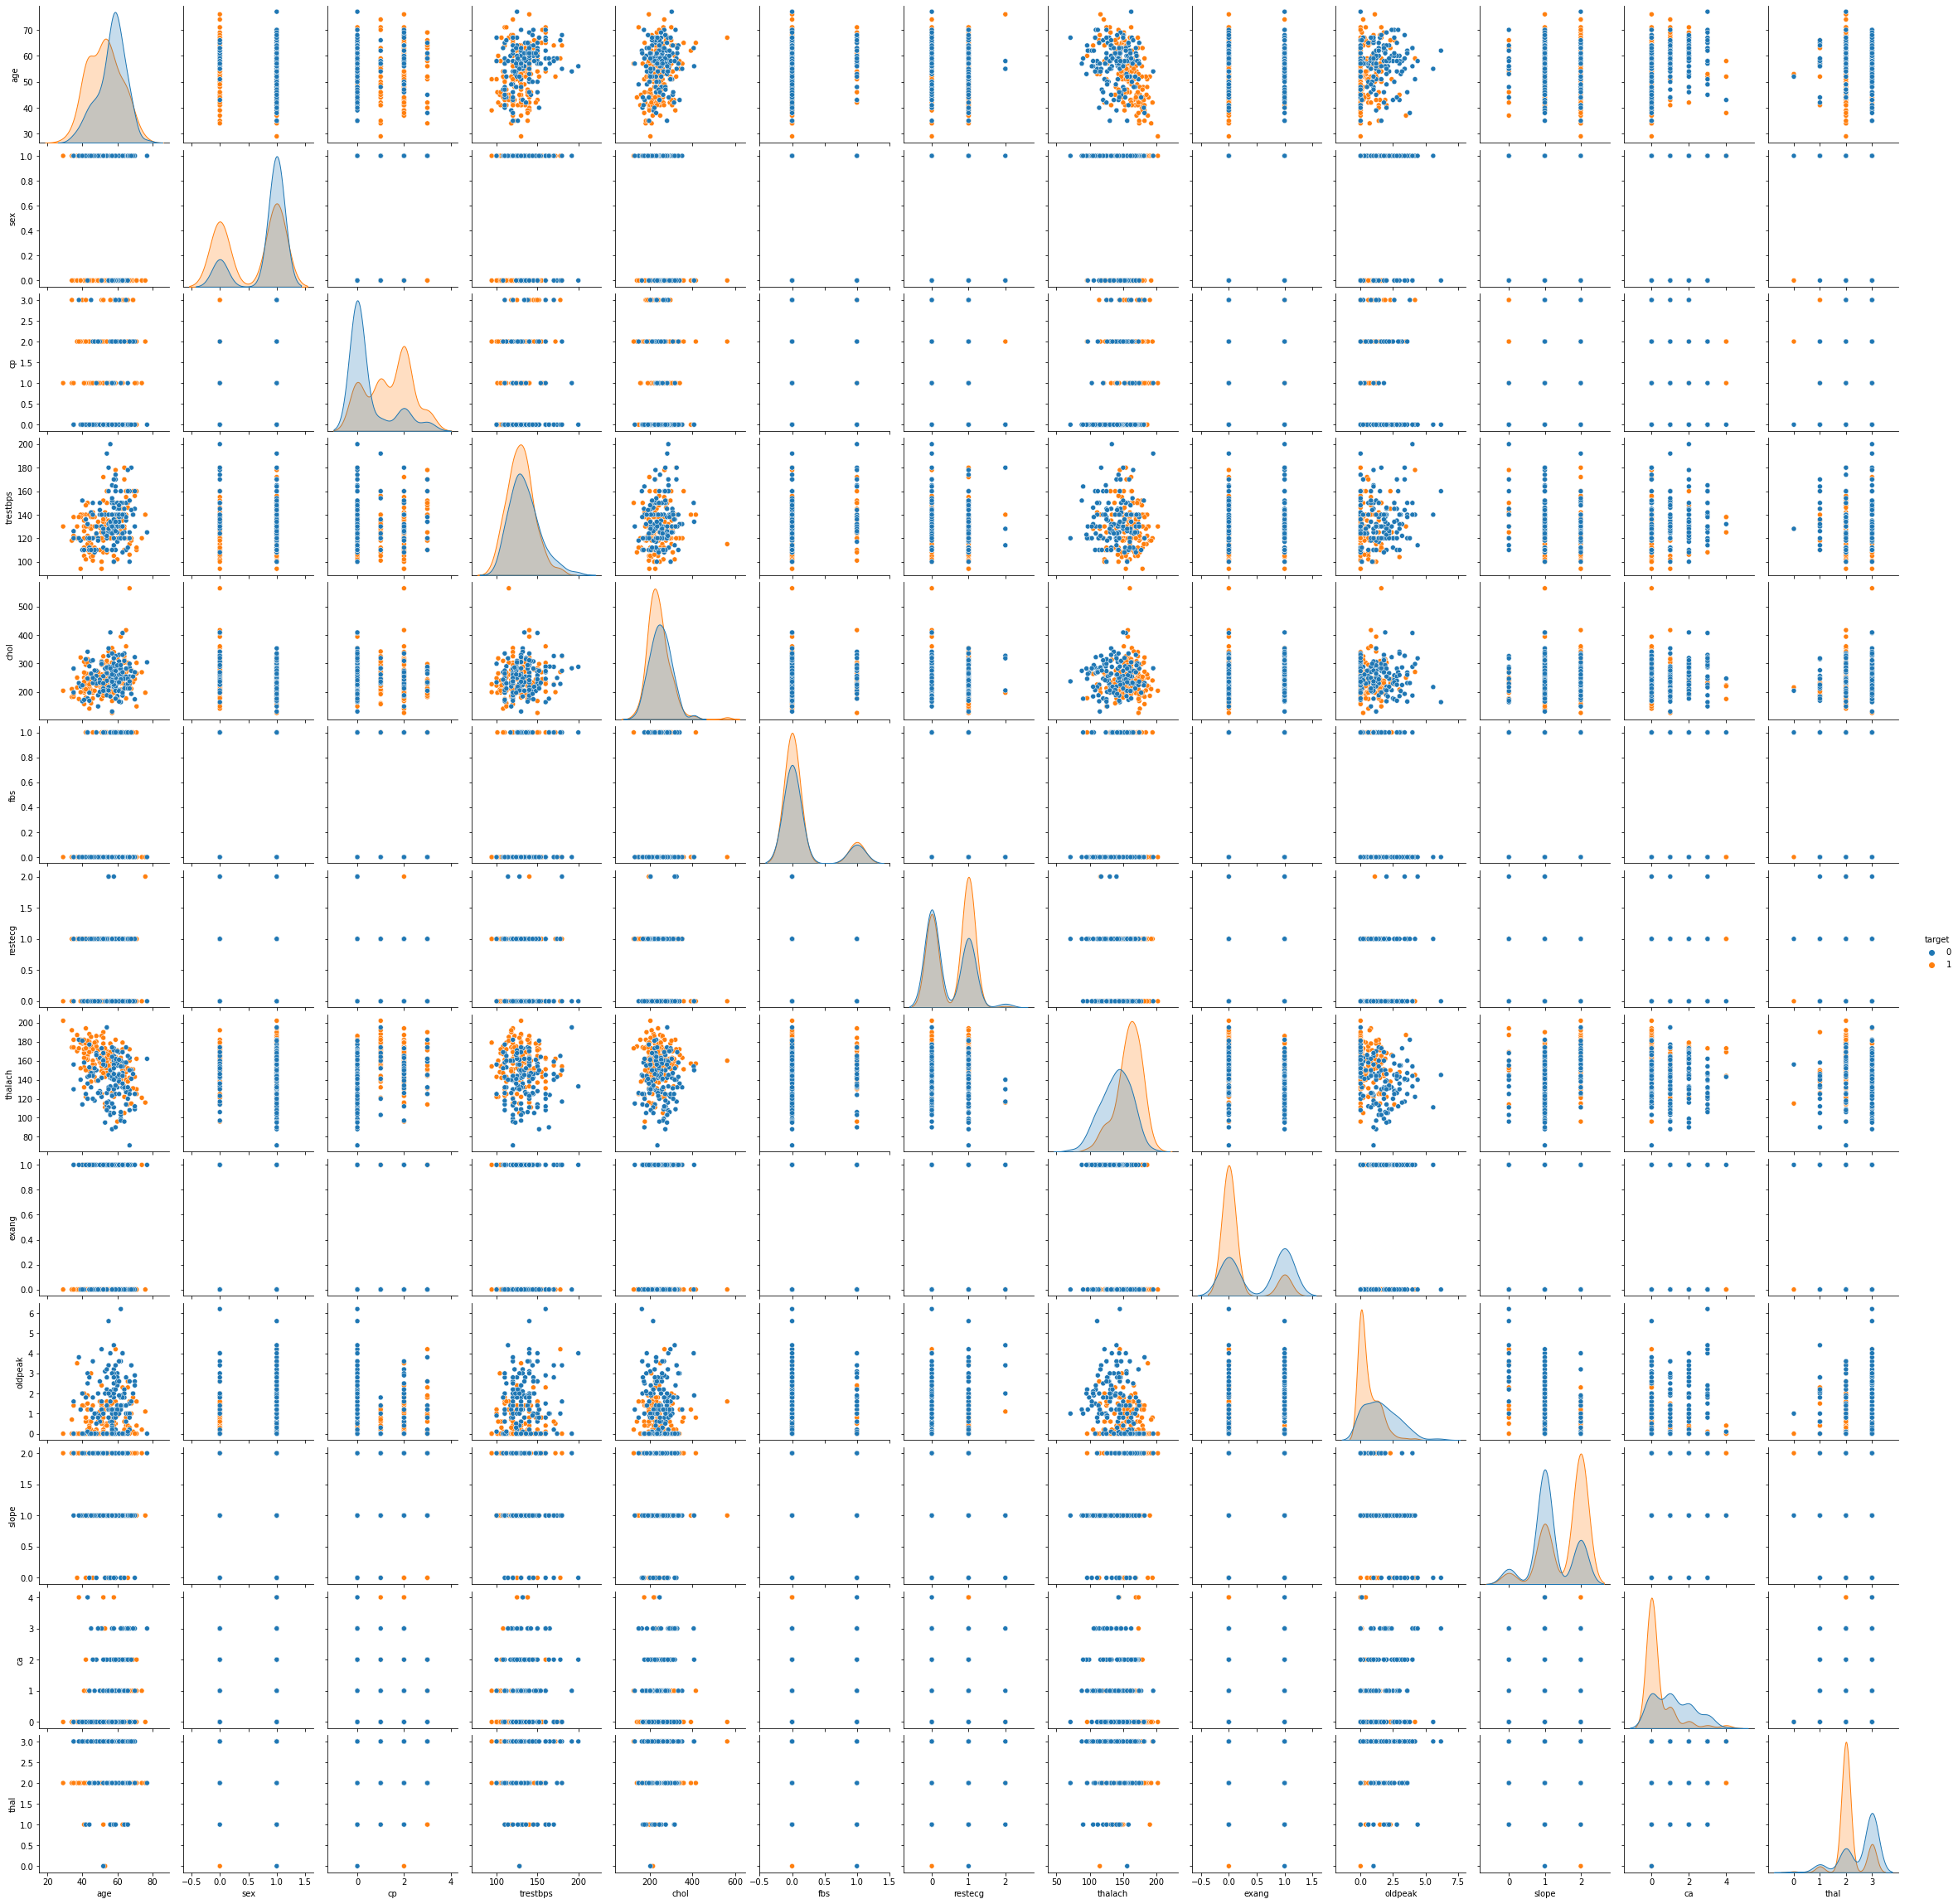

In [23]:
sns.pairplot(data=df,kind="scatter", hue="target");
plt.show();

#### Line Chart

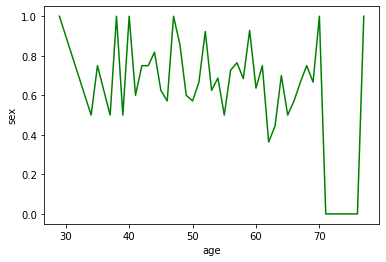

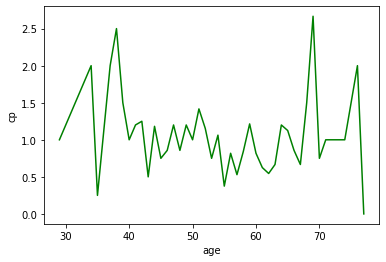

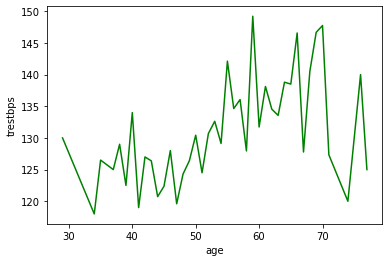

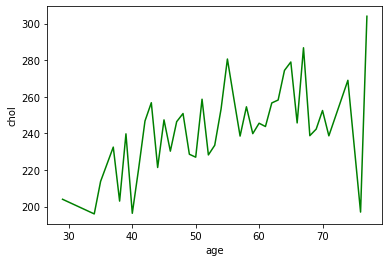

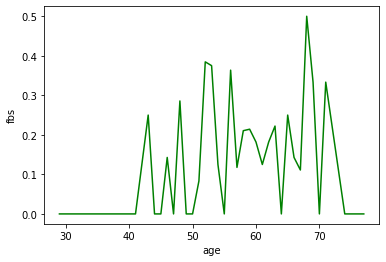

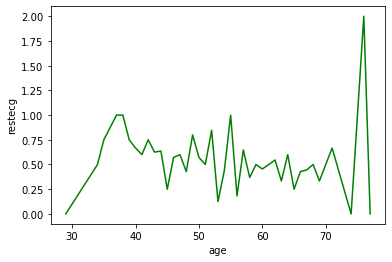

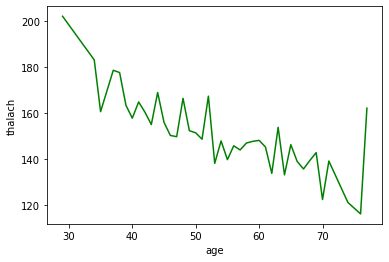

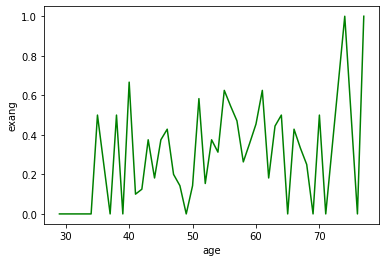

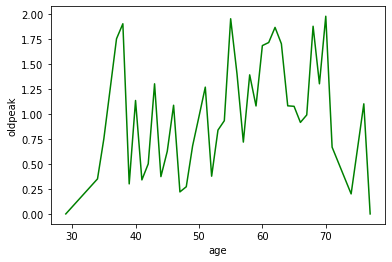

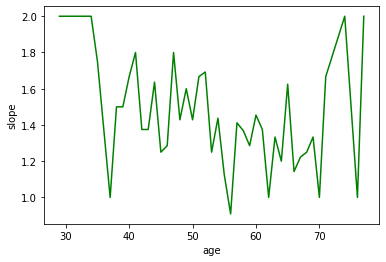

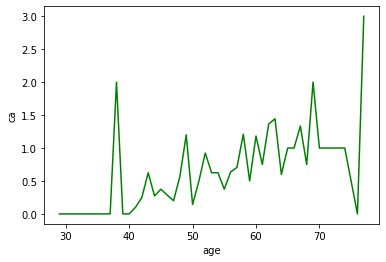

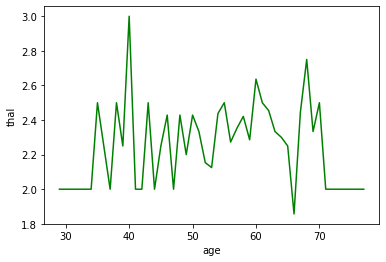

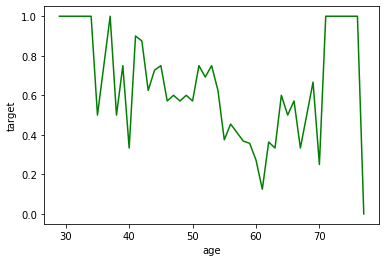

In [26]:
a = ['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
for i in a:
    sns.lineplot(x="age",y=df[i],data=df,ci=None,color="Green")
    plt.show();

#### Scaling

In [27]:
x=df.iloc[:,:-1].values

In [28]:
y=df.iloc[:,-1].values

#### Check whether the data is imbalanced

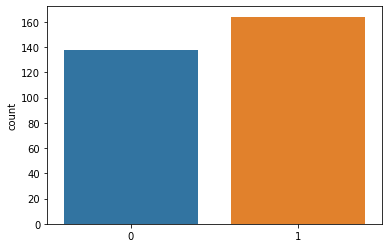

In [29]:
sns.countplot(x=y);

#### We can see that the data is balanced, so we use oversampling

###### Initialize the sampler

In [30]:
over_sampler = RandomOverSampler()

In [31]:
x,y = over_sampler.fit_resample(x,y)

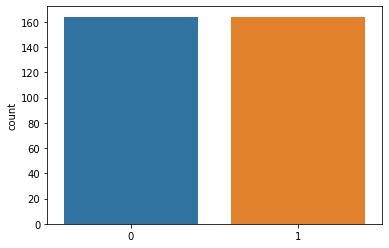

In [32]:
sns.countplot(x=y);

#### we can see now the data is balanced

##### Standarize

In [33]:
sc=StandardScaler()

In [34]:
x=sc.fit_transform(x)

#### Selecting Random Forest classifier

In [35]:
model = RandomForestClassifier()

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [37]:
model.fit(x_train, y_train)
print("model trained with {}".format(model))
score_train =accuracy_score (y_train, model.predict(x_train))
score_tst = accuracy_score(y_test, model.predict(x_test))
con_train = confusion_matrix(y_train, model.predict(x_train))
con_test = confusion_matrix(y_test, model.predict(x_test))
print("Model accuracy on train is:: ",score_train)
print("Model accuracy on test is:: ", score_tst)
print("confusion_matrix train is:: ", con_train)
print("confusion_matrix test is:: ", con_test)
print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))
print("*"*60)

model trained with RandomForestClassifier()
Model accuracy on train is::  1.0
Model accuracy on test is::  0.8636363636363636
confusion_matrix train is::  [[134   0]
 [  0 128]]
confusion_matrix test is::  [[25  5]
 [ 4 32]]
Wrong Predictions made: 9 / 66
************************************************************


##### Now we can Compare the actual and predicted value

In [38]:
OUTPUT= pd.DataFrame(zip(y,model.predict(x)), columns=("ACTUAL", "PREDICTION"), dtype = int)
OUTPUT.sample(10)

,ACTUAL,PREDICTION
107,1,1
130,1,1
86,1,1
171,0,1
292,0,0
166,0,0
191,0,0
46,1,1
325,0,0
261,0,0


#### Plotting Confusion Matrix for training and testing

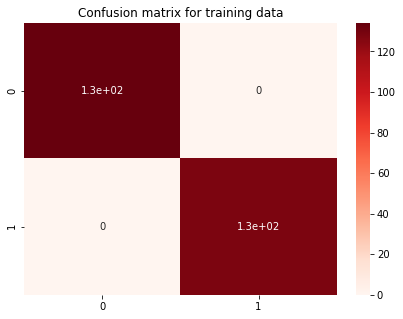

In [40]:
plt.figure(figsize=(7,5))
plt.title("Confusion matrix for training data")
sns.heatmap(con_train, annot=True, cmap='Reds');

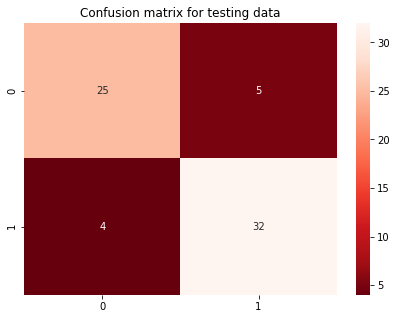

In [41]:
plt.figure(figsize=(7,5))
plt.title("Confusion matrix for testing data")
sns.heatmap(con_test, annot=True, cmap='Reds_r');

### Computing ROC and AUC

Model used is :: RandomForestClassifier()


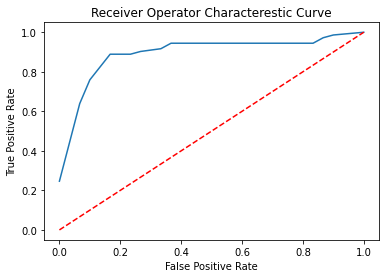

In [42]:
model.fit(x_train,y_train)
probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr,tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr,tpr)
print("Model used is ::",model)
sns.lineplot(x=fpr,y=tpr,ci=None)
plt.plot([0,1],[0,1],color="Red",linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operator Characterestic Curve')
plt.show();